In [2]:
# To handle dataset
import pandas as pd 
import numpy as np

# For visuals 
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Load dataset
data = pd.read_csv('train.csv')

#rows and columns
print(data.shape)

# print dataframe
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Quickly check which columns have NaN
data.info()

#I looks like Alley and LotArea might need further inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# drop id, high cardinality and will not be useful in this analysis
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

The house price data set contains 
Rows: 1460
Columns: 80


# This Analysis will consist of 
1. Target variable
2. Varible Type(continous and numerical)
3. Missing Data
4. Numerical Variables
    - Discrete
    - Continous
    - Distribution
    - Transformation
5. Catergorical
    - Cardinality
    - Rare Labels 
    - Special mappings

## Target
Target distribution

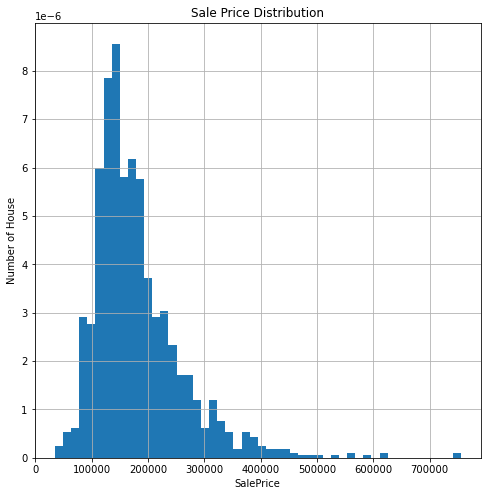

In [6]:
# histograms are a great option to look at the distribution of a feature

data['SalePrice'].hist(bins=50, grid=True, density=True, figsize=(8,8))
plt.title('Sale Price Distribution')
plt.ylabel('Number of House')
plt.xlabel('SalePrice')
plt.show()

- You can see the distribution is Right Skewed.
- You can see outliers 
- The median fall some where around 250000
- The mean falls some where around 150000 


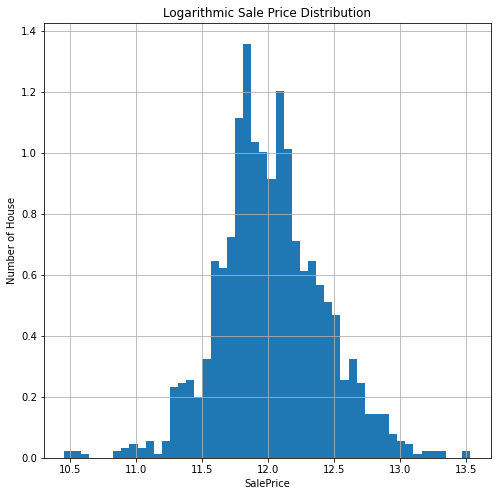

In [7]:
# We can get a better representation of the distribution by applying a logarithmic function
np.log(data['SalePrice']).hist(bins=50, grid=True, density=True, figsize=(8,8))
plt.title('Logarithmic Sale Price Distribution')
plt.ylabel('Number of House')
plt.xlabel('SalePrice')
plt.show()

## Variable Types
Lets id categorical and numerical variables

In [8]:
## After looking in the data_description.txt file we can see the columns that are numberical or catergorical
## file is avaivable in kaggle
cat_vars = [var for var in data.columns if data[var].dtype == 'O'] + ['MSSubClass']

# Number of catergorical variable
len(cat_vars)


44

In [9]:
# Cast all Columns that should be data type catergorical
data[cat_vars] = data[cat_vars].astype('O')

In [10]:
# Lets find the Numberical variables 
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

# Number of Numberical variabe
len(num_vars)

35

# Missing Values
Finding what features have missing values or NaN

In [11]:
# Make a list of the features that contain missing values 
var_null =  [var for var in data.columns if data[var].isnull().sum() > 0]

# Find the percentage of missing values(expressed as decimals)
# and display the results ordered by % of missing data

data[var_null].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Anything above 30% is a significant amount of missing values. If left this will effect the overall analysis.

The rest of the feature that contain a reasonable size of missing values can be addressed by replacing those missing values with the mean or mode. 

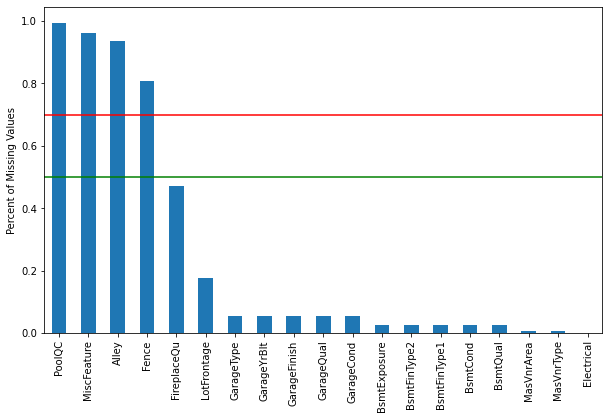

In [14]:
# Let visualize this and place limit on a missing value threshold

data[var_null].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.ylabel('Percent of Missing Values')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axhline(y=0.50, color='g', linestyle='-')
plt.show()

In [15]:
# Lets determine the features that contain nulls(cat - num)
cat_null = [var for var in cat_vars if var in var_null]
num_null = [var for var in num_vars if var in var_null]

print("Number of categorical variables with null: ", len(cat_null))
print("Number of numerical variables with null: ", len(num_null))


Number of categorical variables with null:  16
Number of numerical variables with null:  3


In [16]:
num_null

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
cat_null

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [30]:
def analyse_null_value(df, var):
    """"" A function to analysis null/missing values and how it effects the sales price

    Args:
        df (_type_): DataFame that contains the housing data and sales price
        var (_type_): A feature that contains null values 
    """
    cat_vars = [var for var in df.columns if df[var].dtype == 'O'] + ['MSSubClass']
    
    #Step 1: Create a copy of the dataset
    df = df.copy()
    df2 = df.copy()
    
    #Step 2: create interim variable that indicates 1 if the observation was missing or 0 
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    #Step 3: compare the median SalePrice in the observations where data is missing vs
    #the observation where data is available
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    
    #Step 4: Plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color="blue")
    
    plt.show()
    print(var)
    print(df2[var].isnull().mean())
    
    if var in cat_vars:
        print('Catergorical')
    else:
        print('Numerical')

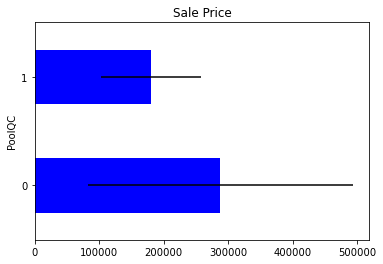

PoolQC
0.9952054794520548
Catergorical


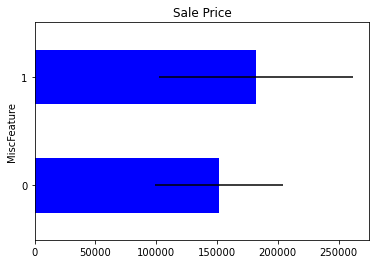

MiscFeature
0.963013698630137
Catergorical


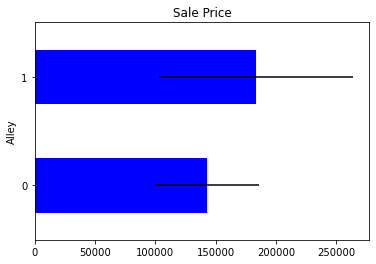

Alley
0.9376712328767123
Catergorical


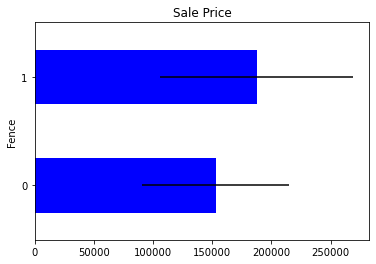

Fence
0.8075342465753425
Catergorical


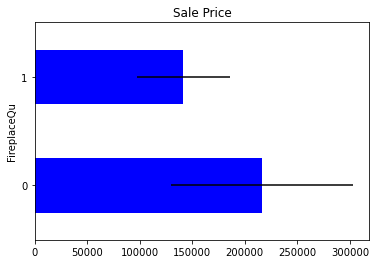

FireplaceQu
0.4726027397260274
Catergorical


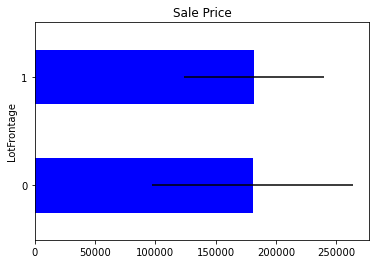

LotFrontage
0.1773972602739726
Numerical


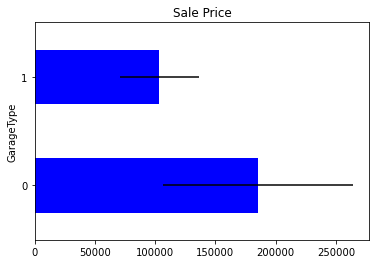

GarageType
0.05547945205479452
Catergorical


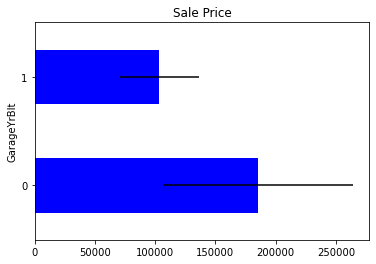

GarageYrBlt
0.05547945205479452
Numerical


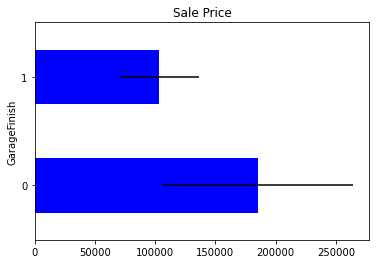

GarageFinish
0.05547945205479452
Catergorical


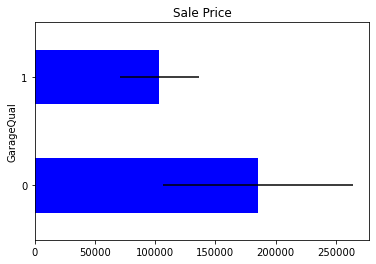

GarageQual
0.05547945205479452
Catergorical


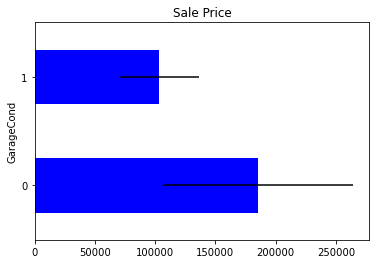

GarageCond
0.05547945205479452
Catergorical


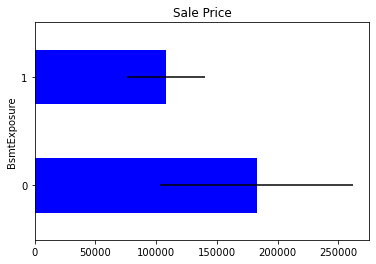

BsmtExposure
0.026027397260273973
Catergorical


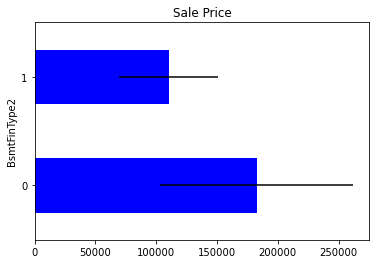

BsmtFinType2
0.026027397260273973
Catergorical


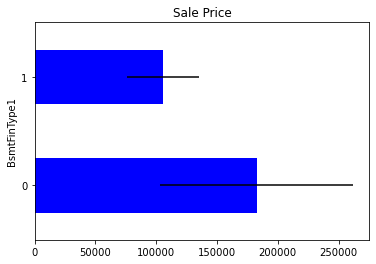

BsmtFinType1
0.025342465753424658
Catergorical


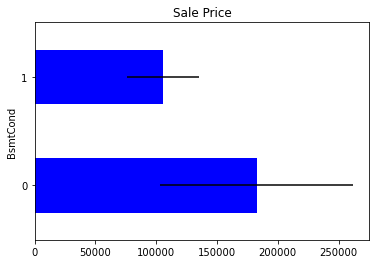

BsmtCond
0.025342465753424658
Catergorical


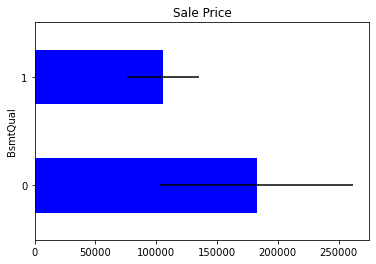

BsmtQual
0.025342465753424658
Catergorical


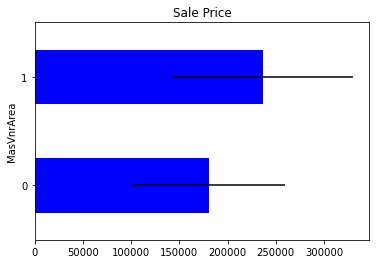

MasVnrArea
0.005479452054794521
Numerical


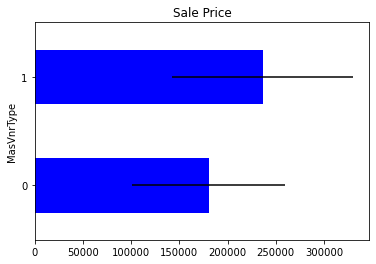

MasVnrType
0.005479452054794521
Catergorical


c:\Users\ericr\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\ericr\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


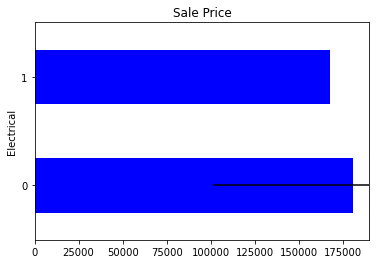

Electrical
0.0006849315068493151
Catergorical


In [31]:
# plot 
var_null_sorted = data[var_null].isnull().mean().sort_values(ascending=False).index

for var in var_null_sorted:
    analyse_null_value(data, var)

Missing could be a good predictor of Sales Price

# Numerical Variables
Lets find out what variables we have in the dataset

In [32]:
print('Number of numerical variables: ', len(num_vars))

data[num_vars].head()

Number of numerical variables:  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


## Temporal Variables
We have 4 year variables in the dataset:

- YearBuilt: Year in which the house was built
- YearRemodAdd: Year in which the house was remodeled
- GarageYrBlt: Year in which a garage was built
- YrSold: Year in which the house was sold

We typically do not use raw date fromat, in this case we will find differences btw time features

In [33]:
# list of variables that contain year info 

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [34]:
# let's explore the values of these temp variables 

for var in year_vars:
    print(var)
    print(data[var].unique())
    

YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Evolution of Sale Price')

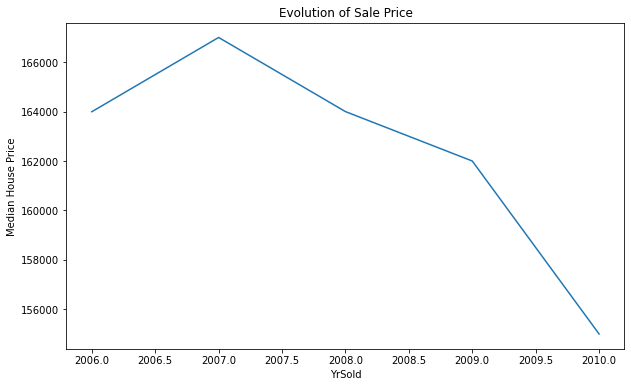

In [37]:
# Lets dive in the evolution of the sale price with respect to YrSold
data.groupby('YrSold')['SalePrice'].median().plot(figsize=(10,6))
plt.ylabel('Median House Price')
plt.title('Evolution of Sale Price')

This sits right with the fact of the house market crash

Text(0.5, 1.0, 'Median Sale Price VS Year Built')

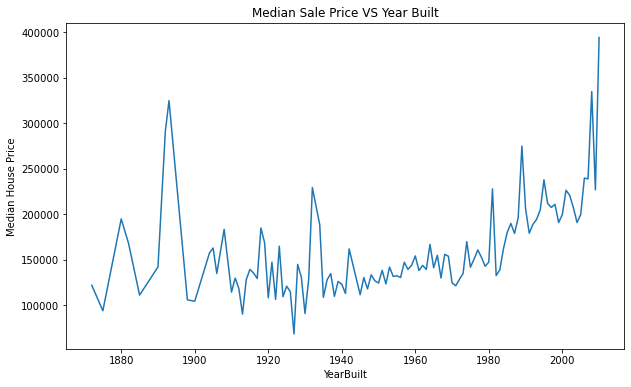

In [38]:
# plot median sale price vs year in which it was built

data.groupby('YearBuilt')['SalePrice'].median().plot(figsize=(10,6))
plt.ylabel('Median House Price')
plt.title('Median Sale Price VS Year Built')


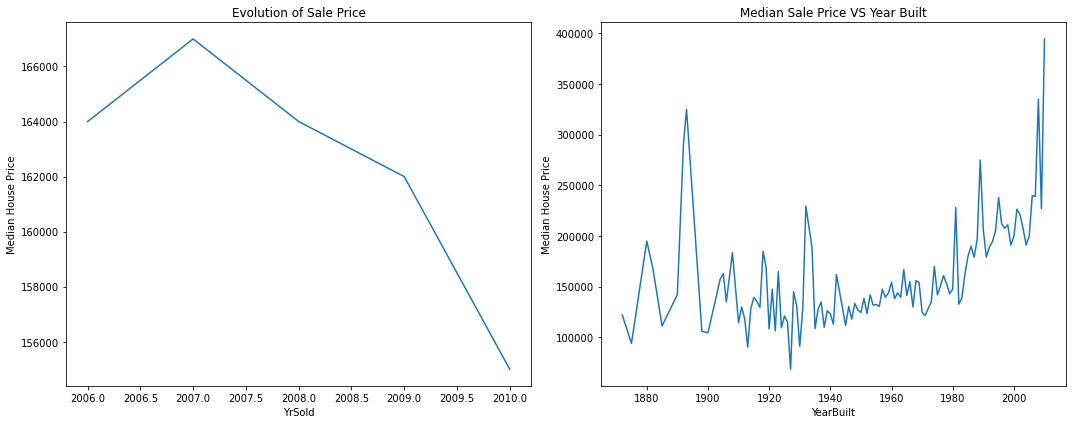

In [46]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
ax1.plot(data.groupby('YrSold')['SalePrice'].median())
ax1.set_title('Evolution of Sale Price')
ax1.set(ylabel='Median House Price', xlabel='YrSold')
ax2.plot(data.groupby('YearBuilt')['SalePrice'].median())
ax2.set_title('Median Sale Price VS Year Built')
ax2.set(ylabel='Median House Price', xlabel='YearBuilt')
fig.tight_layout()



Looking at these both graphs tells us that during the period from 2007-2010 we experience a crash in the market, with prices of new houses being built being exteremely expensive compared to years prior. 

Does this mean during this time under normal conditions of building a house is becoming more expensive (labor, material, etc) or are the type of homes being built are more expensive due to additional things that are expected from a new house?


